In [1]:
import matplotlib.pyplot as plt

from pprint import pprint
from Algorithms.ddpg import config

# 0. Plot setting

In [2]:
import seaborn as sb
import matplotlib

sb.set_style('whitegrid')

FONTSIZE = 10
matplotlib.rcParams["figure.figsize"] = (10, 5)
matplotlib.rcParams["figure.dpi"] = 100
matplotlib.rcParams["figure.titlesize"] = FONTSIZE
matplotlib.rcParams["legend.fontsize"] = FONTSIZE
matplotlib.rcParams["xtick.labelsize"] = FONTSIZE
matplotlib.rcParams["ytick.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.labelsize"] = FONTSIZE
matplotlib.rcParams["axes.titlesize"] = FONTSIZE
matplotlib.rcParams["savefig.bbox"] = "tight"
matplotlib.rcParams["savefig.pad_inches"] = 0.1
matplotlib.rcParams["lines.linewidth"] = 2
matplotlib.rcParams["axes.linewidth"] = 1.6

# 1. Model Setting

## 1.1 Load Config

In [3]:
env_kwargs, model_kwargs, learn_kwargs = config.load_config('tmp_config.yaml')

env 'BSMarket was created!
env 'BSMarket was created!


In [4]:
from Env.feature_extractor import MarketObsExtractor

actor_name = "mlp"  #@param ["mlp", "ntb"]

model_kwargs.update({
    'buffer_size': 300,
    'learning_starts': 300,
    'batch_size': 15,
    'std_coeff': env_kwargs['cost']
})

model_kwargs['policy_kwargs'].update({
    'features_extractor_class': MarketObsExtractor,
    'actor': actor_name,
})

if actor_name=='ntb':
    model_kwargs['policy_kwargs'].update({
        'net_arch': {'pi': [16, 16],  # actor net arch
                     'qf': [8]}  # critic net arch
    })

    model_kwargs['policy_kwargs']['features_extractor_kwargs'].update({
        'features_out': 16,
        'net_arch': [32, 32]
    })

learn_kwargs.update({
    'total_timesteps': 2000
})

In [5]:
config.reconstruct_config(env_kwargs, model_kwargs, learn_kwargs)

env 'BSMarket was created!
model_kwargs['env']: <BSMarket instance>
env 'BSMarket was created!
learn_kwargs['eval_env']: <BSMarket instance>
learn_kwargs['tb_log_name']: ddpg_220603-1803
learn_kwargs['eval_log_path']: logs/tb_logs/ddpg_220603-1803_1


In [6]:
pprint(env_kwargs)

{'cost': 0.02,
 'dividend': 0.0,
 'drift': 0.0,
 'freq': 1,
 'gen_name': 'gbm',
 'init_price': 1.0,
 'n_assets': 1000,
 'n_periods': 30,
 'payoff': 'european',
 'period_unit': 365,
 'reward_mode': 'pnl',
 'risk_free_interest': 0.0,
 'strike': 1.0,
 'volatility': 0.2}


In [7]:
pprint(model_kwargs)

{'action_noise': NormalActionNoise(mu=0.0, sigma=0.1),
 'batch_size': 15,
 'buffer_size': 300,
 'create_eval_env': False,
 'device': 'auto',
 'env': <Env.env.BSMarket object at 0x0000016BC2D96160>,
 'gamma': 0.99,
 'gradient_steps': -1,
 'learning_rate': <function lr_schedule at 0x0000016BC2BD1EE0>,
 'learning_starts': 300,
 'optimize_memory_usage': False,
 'policy': <class 'Algorithms.policies.DoubleTD3Policy'>,
 'policy_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>,
                   'actor': 'mlp',
                   'features_extractor_class': <class 'Env.feature_extractor.MarketObsExtractor'>,
                   'features_extractor_kwargs': {'activation_fn': <class 'torch.nn.modules.activation.ReLU'>,
                                                 'features_in': 4,
                                                 'features_out': 2,
                                                 'net_arch': [32, 64]},
                   'n_critics': 1,
                 

In [8]:
pprint(learn_kwargs)

{'callback': <Algorithms.learn.utils.callbacks.ReportCallbacks object at 0x0000016BC2BDA340>,
 'eval_env': <Env.env.BSMarket object at 0x0000016BC2D96220>,
 'eval_freq': 30,
 'eval_log_path': 'logs/tb_logs/ddpg_220603-1803_1',
 'log_interval': 30,
 'n_eval_episodes': 1,
 'reset_num_timesteps': True,
 'tb_log_name': 'ddpg_220603-1803',
 'total_timesteps': 2000}


In [9]:
# env_kwargs, model_kwargs, learn_kwargs = config.load_config('logs/tb_logs/ddpg_220526-1356_1/config.yaml')

In [10]:
# config.reconstruct_config(env_kwargs, model_kwargs, learn_kwargs)

## 1.2 Construct env, model

In [11]:
from Algorithms import DDPG

model = DDPG(**model_kwargs)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [12]:
model.policy

DoubleTD3Policy(
  (actor): CustomActor(
    (features_extractor): MarketObsExtractor(
      (layers): Sequential(
        (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=4, out_features=32, bias=True)
        (2): ReLU()
        (3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): Linear(in_features=32, out_features=64, bias=True)
        (5): ReLU()
        (6): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (7): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (mu): Sequential(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Tanh()
    )
    (flatten): Flatten(start_dim=-2, end_dim=-1)
  )
  (actor_target): CustomActor(
    (features_extractor): MarketObsExtractor(
      (layers): Sequential(
        (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

## 1.3 Before Learning Plot

In [13]:
import numpy as np

env = model_kwargs['env']
# total_pnl = env.pnl_eval(model)

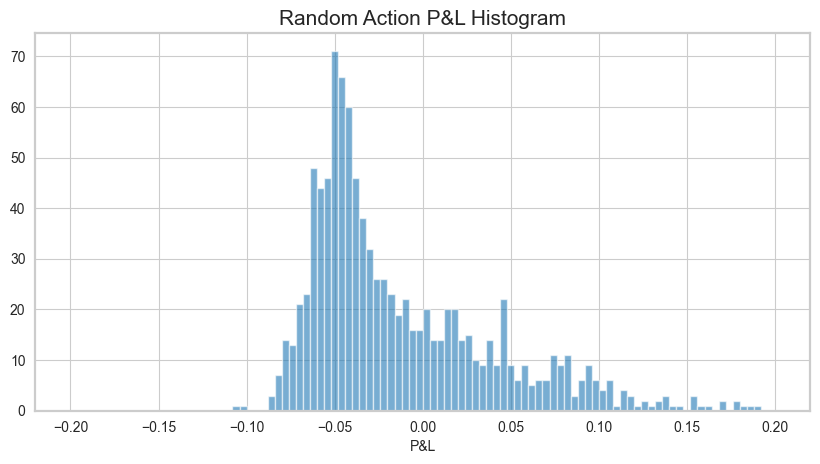

-0.013839361550768679


In [33]:
plt.title('Random Action P&L Histogram', size=15)
plt.xlabel('P&L')
plt.hist(total_pnl, bins=100, range=(-0.2, 0.2), alpha=0.6)
plt.show()
print(np.mean(total_pnl)-0.02*np.std(total_pnl))

# 2. Learning

In [14]:
model = model.learn(**learn_kwargs)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/tb_logs\ddpg_220603-1803_1
[Training Start]
Eval num_timesteps=30, episode_reward=-0.58 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.584   |
| time/              |          |
|    total timesteps | 30       |
---------------------------------
New best mean reward!
Eval num_timesteps=60, episode_reward=-0.59 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.591   |
| time/              |          |
|    total timesteps | 60       |
---------------------------------
Eval num_timesteps=90, episode_reward=-0.59 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_r

In [15]:
config.save_config(f'{learn_kwargs["eval_log_path"]}/config.yaml', env_kwargs, model_kwargs, learn_kwargs)

<BSMarket instance> will be save as name. env_kwargs not in kwargs!
<BSMarket instance> will be save as name. eval_env_kwargs not in kwargs!
<Algorithms.learn.utils.callbacks.ReportCallbacks object at 0x0000016BC2BDA340> will be save as name. callback_kwargs not in kwargs!
logs/tb_logs/ddpg_220603-1803_1/config.yaml was saved.


# 3. P&L Evaluation

## 3.1 Load Bset Model

In [21]:
print(learn_kwargs['eval_log_path'])
model = model.load(learn_kwargs['eval_log_path'] + '/best_model')

logs/tb_logs/ddpg_220603-1803_1


## 3.2 Calculate P&L Reward

In [17]:
import numpy as np

def pnl_reward(pnl):
    mean = np.mean(pnl)
    std = np.std(pnl)
    return mean - 0.02 * std , (mean, std)

In [18]:
random_pnl = np.load('../../test/random_pnl.npy')
delta_pnl = np.load('../../test/delta_pnl.npy')
rl_pnl = np.load('../../test/rl_pnl.npy')

In [22]:
env = model_kwargs['env']
rl_pnl2 = np.mean([env.pnl_eval(model) for _ in range(30)], axis=0)

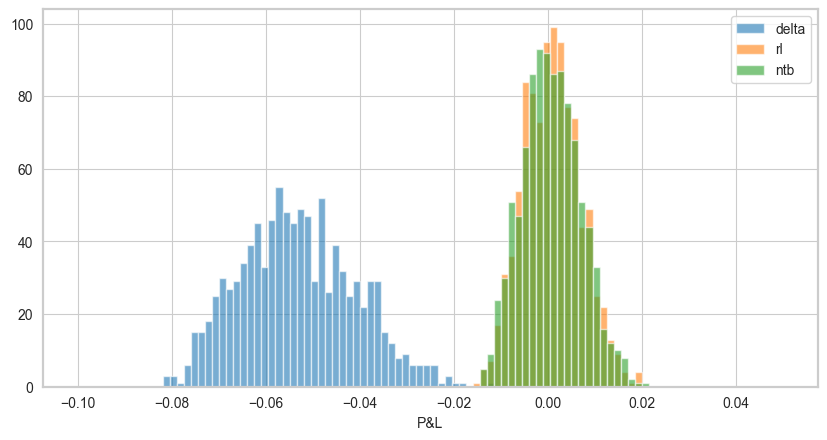

delta:	-0.0536, -0.0534, 0.0122
rl:		0.0007, 0.0008, 0.0061
ntb:		0.0006, 0.0007, 0.0062
82.69192693642269
-0.17471330792100984


In [23]:
plt.xlabel('P&L')
# plt.hist(random_pnl, bins=100, range=(-0.25, 0.05), alpha=0.6, label='random')
plt.hist(delta_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='delta')
plt.hist(rl_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='rl')
plt.hist(rl_pnl2, bins=100, range=(-0.1, 0.05), alpha=0.6, label='ntb')
plt.legend()
plt.show()

r1, (m1, s1) = pnl_reward(delta_pnl)
r2, (m2, s2) = pnl_reward(rl_pnl)
r3, (m3, s3) = pnl_reward(rl_pnl2)
print(f'delta:\t{r1:.4f}, {m1:.4f}, {s1:.4f}')
print(f'rl:\t\t{r2:.4f}, {m2:.4f}, {s2:.4f}')
print(f'ntb:\t\t{r3:.4f}, {m3:.4f}, {s3:.4f}')
print((r2-r1)/abs(r2))
print((r3-r2)/abs(r3))

# 6. Comparison with Delta Hedging

$$ \delta = \frac{\partial V}{\partial S} $$

=> 즉 $S = n(u)$이면 ($u$는 기초자산 단위) 여기서 $S$가 순간 변화할 때 $V\pm n(u)$ 가 되는 것

따라서 $N$ 만큼의 옵션 매도자가 순간의 기초자산 가격 변화로 얻게 되는 reward는 $\pm N\delta (u)$
따라서 위험을 없애려면 미리 기초자산을 $N\delta$ 만큼 사두어서 기초자산 가격 상승에 대한 팔아버린 옵션 가격 손해를 상쇄해야 한다.

In [10]:
total_delta = env.delta_eval()

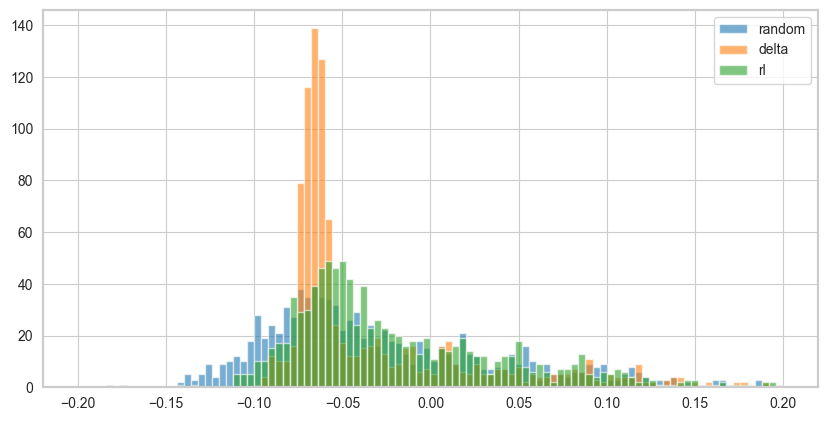

In [11]:
plt.hist(total_pnl, bins=100, range=(-0.2, 0.2), alpha=0.6, label='random')
plt.hist(total_delta, bins=100, range=(-0.2, 0.2), alpha=0.6, label='delta')
plt.hist(total_pnl_after2, bins=100, range=(-0.2, 0.2), alpha=0.6, label='rl')
plt.legend()
plt.show()

In [12]:
pnl_reward = lambda costs: np.mean(costs) - 0.02 * np.std(costs)

random_pnl = pnl_reward(total_pnl)
delta_pnl = pnl_reward(total_delta)
rl_pnl = pnl_reward(total_pnl_after2)

print(round(random_pnl, 3))
print(round(delta_pnl, 3))
print(round(rl_pnl, 3))
print(f'random vs rl: {(rl_pnl - random_pnl)/abs(rl_pnl)}\t delta vs rl: {(rl_pnl-delta_pnl)/abs(rl_pnl)}')

-0.026
-0.029
-0.019
random vs rl: 0.3648112415299505	 delta vs rl: 0.5027950392294215


In [19]:
np.mean(total_pnl_after2), np.std(total_pnl_after2)

(-0.01818414391712121, 0.060616269201297444)

In [20]:
np.mean(total_delta), np.std(total_delta)

(-0.02781617338557662, 0.0666372229376547)

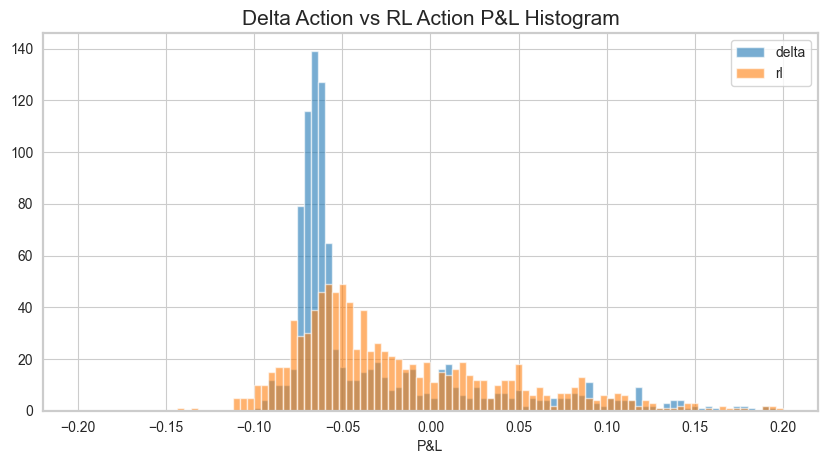

In [22]:
plt.title('Delta Action vs RL Action P&L Histogram', size=15)
plt.xlabel('P&L')
plt.hist(total_delta, bins=100, range=(-0.2, 0.2), alpha=0.6, label='delta')
plt.hist(total_pnl_after2, bins=100, range=(-0.2, 0.2), alpha=0.6, label='rl')
plt.legend()
plt.show()

## 추가 Eval

In [19]:
model = model.load(learn_kwargs['eval_log_path']+'/best_model')

In [22]:
def pnl_reward(pnl):
    mean = np.mean(pnl)
    std = np.std(pnl)
    return mean - 0.02 * std , (mean, std)

In [23]:
random_pnl = np.load('../../test/random_pnl.npy')
delta_pnl = np.load('../../test/delta_pnl.npy')
rl_pnl = np.load('../../test/rl_pnl.npy')
ntb_pnl = np.mean([env.pnl_eval(model) for _ in range(30)], axis=0)

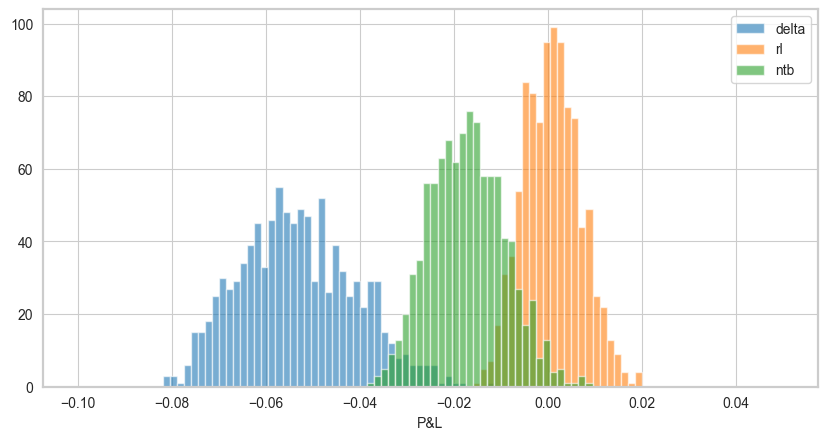

delta:	-0.0536, -0.0534, 0.0122
rl:		0.0007, 0.0008, 0.0061
ntb:		-0.0173, -0.0172, 0.0080
82.69192693642269
-1.0378967080683


In [24]:
plt.xlabel('P&L')
# plt.hist(random_pnl, bins=100, range=(-0.25, 0.05), alpha=0.6, label='random')
plt.hist(delta_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='delta')
plt.hist(rl_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='rl')
plt.hist(ntb_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='ntb')
plt.legend()
plt.show()

r1, (m1, s1) = pnl_reward(delta_pnl)
r2, (m2, s2) = pnl_reward(rl_pnl)
r3, (m3, s3) = pnl_reward(ntb_pnl)
print(f'delta:\t{r1:.4f}, {m1:.4f}, {s1:.4f}')
print(f'rl:\t\t{r2:.4f}, {m2:.4f}, {s2:.4f}')
print(f'ntb:\t\t{r3:.4f}, {m3:.4f}, {s3:.4f}')
print((r2-r1)/abs(r2))
print((r3-r2)/abs(r3))

In [25]:
np.save('../../test/ntb_pnl.npy', ntb_pnl)

## DDPG re-learning

In [26]:
env_kwargs, model_kwargs, learn_kwargs = config.load_config('tmp_config.yaml')

env 'BSMarket was created!
env 'BSMarket was created!


In [27]:
from Env.feature_extractor import MarketObsExtractor

model_kwargs.update({
    'buffer_size': 300,
    'learning_starts': 300,
    'batch_size': 15,
    'std_coeff': env_kwargs['cost']
})

model_kwargs['policy_kwargs'].update({
    'features_extractor_class': MarketObsExtractor,
    'actor': 'mlp'
})

learn_kwargs.update({
    'total_timesteps': 2500
})

In [28]:
config.reconstruct_config(env_kwargs, model_kwargs, learn_kwargs)

env 'BSMarket was created!
model_kwargs['env']: <BSMarket instance>
env 'BSMarket was created!
learn_kwargs['eval_env']: <BSMarket instance>
learn_kwargs['tb_log_name']: ddpg_220601-2056
learn_kwargs['eval_log_path']: logs/tb_logs/ddpg_220601-2056_1


In [29]:
model = DDPG(**model_kwargs)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [30]:
model.policy

DoubleTD3Policy(
  (actor): CustomActor(
    (features_extractor): MarketObsExtractor(
      (layers): Sequential(
        (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (1): Linear(in_features=4, out_features=32, bias=True)
        (2): ReLU()
        (3): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): Linear(in_features=32, out_features=64, bias=True)
        (5): ReLU()
        (6): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (7): Linear(in_features=64, out_features=2, bias=True)
      )
    )
    (mu): Sequential(
      (0): Linear(in_features=2, out_features=1, bias=True)
      (1): Tanh()
    )
    (flatten): Flatten(start_dim=-2, end_dim=-1)
  )
  (actor_target): CustomActor(
    (features_extractor): MarketObsExtractor(
      (layers): Sequential(
        (0): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=Tru

In [31]:
model = model.learn(**learn_kwargs)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to logs/tb_logs\ddpg_220601-2056_1
[Training Start]
Eval num_timesteps=30, episode_reward=-0.58 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.584   |
| time/              |          |
|    total timesteps | 30       |
---------------------------------
New best mean reward!
Eval num_timesteps=60, episode_reward=-0.59 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_reward     | -0.591   |
| time/              |          |
|    total timesteps | 60       |
---------------------------------
Eval num_timesteps=90, episode_reward=-0.59 +/- 0.00
Episode length: 30.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 30       |
|    mean_r

In [32]:
config.save_config(f'{learn_kwargs["eval_log_path"]}/config.yaml', env_kwargs, model_kwargs, learn_kwargs)

logs/tb_logs/ddpg_220601-2056_1/config.yaml was saved.


In [33]:
model = model.load(learn_kwargs['eval_log_path']+'/best_model')

In [34]:
random_pnl = np.load('../../test/random_pnl.npy')
delta_pnl = np.load('../../test/delta_pnl.npy')
rl_pnl = np.load('../../test/rl_pnl.npy')
ntb_pnl = np.load('../../test/ntb_pnl.npy')
rl_pnl2 = np.mean([env.pnl_eval(model) for _ in range(30)], axis=0)

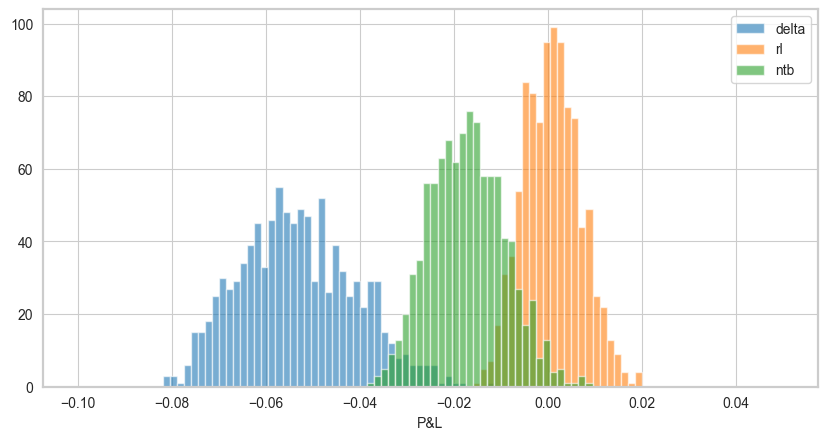

delta:	reward: -0.0536, 	mean pnl: -0.0534, 	std pnl: 0.0122
rl:		reward: 0.0007, 	mean pnl: 0.0008, 	std pnl: 0.0061
ntb:	reward: -0.0173,	 mean pnl: -0.0172, 	std pnl: 0.0080


In [51]:
plt.xlabel('P&L')
# plt.hist(random_pnl, bins=100, range=(-0.25, 0.05), alpha=0.6, label='random')
plt.hist(delta_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='delta')
plt.hist(rl_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='rl')
plt.hist(ntb_pnl, bins=100, range=(-0.1, 0.05), alpha=0.6, label='ntb')
plt.legend()
plt.show()

r1, (m1, s1) = pnl_reward(delta_pnl)
r2, (m2, s2) = pnl_reward(rl_pnl)
r3, (m3, s3) = pnl_reward(ntb_pnl)
print(f'delta:\treward: {r1:.4f}, \tmean pnl: {m1:.4f}, \tstd pnl: {s1:.4f}')
print(f'rl:\t\treward: {r2:.4f}, \tmean pnl: {m2:.4f}, \tstd pnl: {s2:.4f}')
print(f'ntb:\treward: {r3:.4f},\t mean pnl: {m3:.4f}, \tstd pnl: {s3:.4f}')

In [48]:
(r3-r1)

0.036284615923496535

In [47]:
(m3-m1)/s1

2.9567305885600943

In [46]:
(s3-s1)/s1

-0.3497424527378137